In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import zipfile
import os
%matplotlib inline

In [ ]:
!ls

archive.zip  sample_data


In [ ]:
# اسم الملف المضغوط الذي قمت برفعه
zip_file_path = 'archive.zip'
# المجلد الذي سيتم استخراج الملفات فيه
extract_dir = 'extracted_files'

# فتح الملف المضغوط واستخراج الملفات
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# عرض الملفات المستخرجة
for file_name in os.listdir(extract_dir):
    print(file_name)

healty
downSyndorme
labeling.xlsx


In [ ]:
# فتح ملف Excel
excel_file_path = os.path.join(extract_dir, 'labeling.xlsx')
df = pd.read_excel(excel_file_path)

# عرض محتوى ملف Excel
print("Excel File Contents:")
df.head()  # عرض أول 5 صفوف

Excel File Contents:


,dosya,eyetoeye,eyetomouth,class
0,/content/fotolar/fotolar/down_1.jpg,3.3333333333333335,131.666667,1
1,/content/fotolar/fotolar/down_10.jpg,5.0,170.000000,1
2,/content/fotolar/fotolar/down_100.jpg,3.3333333333333335,113.333333,1
3,/content/fotolar/fotolar/down_1000.jpg,1.6666666666666667,106.666667,1
4,/content/fotolar/fotolar/down_1001.jpg,1.6666666666666667,111.666667,1


In [ ]:
df['dosya'] = df['dosya'].str.replace(r'.*/fotolar/', '', regex=True)

# عرض البيانات المعدلة
df

,dosya,eyetoeye,eyetomouth,class
0,down_1.jpg,3.3333333333333335,131.666667,1
1,down_10.jpg,5.0,170.000000,1
2,down_100.jpg,3.3333333333333335,113.333333,1
3,down_1000.jpg,1.6666666666666667,106.666667,1
4,down_1001.jpg,1.6666666666666667,111.666667,1
...,...,...,...,...
1556,healty_238.jpg,20.0,118.333333,0
1557,healty_239.jpg,13.333333333333334,110.000000,0
1558,healty_24.jpg,0.0,105.000000,0
1559,healty_242.jpg,11.666666666666668,110.000000,0


In [ ]:
#/content/extracted_files/downSyndorme/downSyndrome/down_1.jpg
#/content/extracted_files/healty/healty/healty_1.jpg
base_path_down = '/content/extracted_files/downSyndorme/downSyndrome/'
base_path_health = '/content/extracted_files/healty/healty/'

df['path'] = df['dosya'].apply(lambda x: base_path_down + x if x.startswith('down') else base_path_health + x)
df.rename(columns={'class': 'output'}, inplace=True)

In [ ]:
df

,dosya,eyetoeye,eyetomouth,output,path
0,down_1.jpg,3.3333333333333335,131.666667,1,/content/extracted_files/downSyndorme/downSynd...
1,down_10.jpg,5.0,170.000000,1,/content/extracted_files/downSyndorme/downSynd...
2,down_100.jpg,3.3333333333333335,113.333333,1,/content/extracted_files/downSyndorme/downSynd...
3,down_1000.jpg,1.6666666666666667,106.666667,1,/content/extracted_files/downSyndorme/downSynd...
4,down_1001.jpg,1.6666666666666667,111.666667,1,/content/extracted_files/downSyndorme/downSynd...
...,...,...,...,...,...
1556,healty_238.jpg,20.0,118.333333,0,/content/extracted_files/healty/healty/healty_...
1557,healty_239.jpg,13.333333333333334,110.000000,0,/content/extracted_files/healty/healty/healty_...
1558,healty_24.jpg,0.0,105.000000,0,/content/extracted_files/healty/healty/healty_...
1559,healty_242.jpg,11.666666666666668,110.000000,0,/content/extracted_files/healty/healty/healty_...


In [ ]:
def imshow_from_df(df, num_images=5, figsize=(15, 5), rows=1, cmap='gray'):
    # أخذ عينات عشوائية من الصور
    df_sampled = df.sample(n=num_images)  # عينة عشوائية من num_images

    images = []
    titles = []

    for i in range(num_images):
        img_path = df_sampled['path'].iloc[i]
        img = plt.imread(img_path)  # Read the image using plt.imread
        images.append(img)
        titles.append(f"Label: {df_sampled['output'].iloc[i]}")

    cols = len(images) // rows + int(len(images) % rows != 0)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    # في حالة وجود صورة واحدة، نجعل المحاور قابلة للتكرار
    if rows * cols == 1:
        axes = [axes]

    for i, img in enumerate(images):
        ax = axes[i] if rows == 1 else axes[i // cols, i % cols]
        ax.imshow(img, cmap=cmap)
        ax.set_title(titles[i])
        ax.axis('off')  # Hide axes for a cleaner display

    plt.tight_layout()
    plt.show()

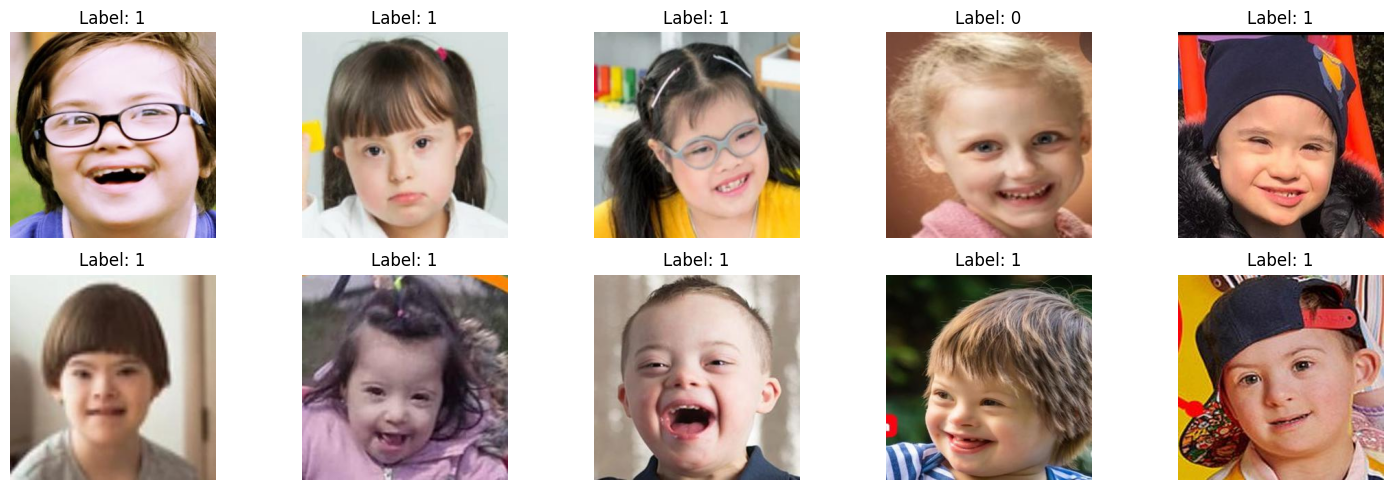

In [ ]:
imshow_from_df(df, num_images=10, rows=2)

In [ ]:
df.isna().sum()

,0
dosya,0
eyetoeye,0
eyetomouth,0
output,0
path,0


In [ ]:
df['eyetomouth'] = pd.to_numeric(df['eyetomouth'], errors='coerce')
df['eyetomouth'] .isna().sum()

0

In [ ]:
df['eyetoeye'] = pd.to_numeric(df['eyetoeye'], errors='coerce')
df['eyetoeye'] .isna().sum()

5

In [ ]:
df.dropna(subset=['eyetoeye'], inplace=True)

In [ ]:
df.isna().sum()

,0
dosya,0
eyetoeye,0
eyetomouth,0
output,0
path,0


In [ ]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى تدريب والتحقق (training + validation)
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=0)  # 80% تدريب + تحقق، 20% اختبار

# تقسيم البيانات المتبقية إلى تدريب والتحقق
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=0)  # 75% تدريب، 25% تحقق

# عرض أحجام المجموعات
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 933
Validation set size: 311
Test set size: 312


In [ ]:
IMG_DIM = 128
def imread(img_path):
    img = cv2.imread(img_path)
    img = img.astype('float32')/255.0
    img = cv2.resize(img, (IMG_DIM, IMG_DIM))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


In [ ]:
def read_images(img_paths):
    img_paths = list(img_paths)
    n = len(img_paths)
    X = np.zeros((n, IMG_DIM, IMG_DIM, 3), dtype='float32')
    for i in tqdm(range(n)):
        path = img_paths[i]
        img = imread(path)
        X[i] = img
    return X

In [ ]:
X_train = read_images(train_df['path'])
X_val = read_images(val_df['path'])
X_test = read_images(test_df['path'])

y_train = train_df['output']
y_val = val_df['output']
y_test = test_df['output']

100%|██████████| 312/312 [00:00<00:00, 1128.57it/s]


### **model with image but without fearure**








In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAvgPool2D, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(16, 7, activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(16, 7, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 5, activation='relu'))
model.add(Conv2D(32, 5, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(GlobalAvgPool2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 122, 122, 16)        │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 116, 116, 16)        │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 58, 58, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 54, 54, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 23, 23, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,017 (500.07 KB)

 Trainable params: 128,017 (500.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 34.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


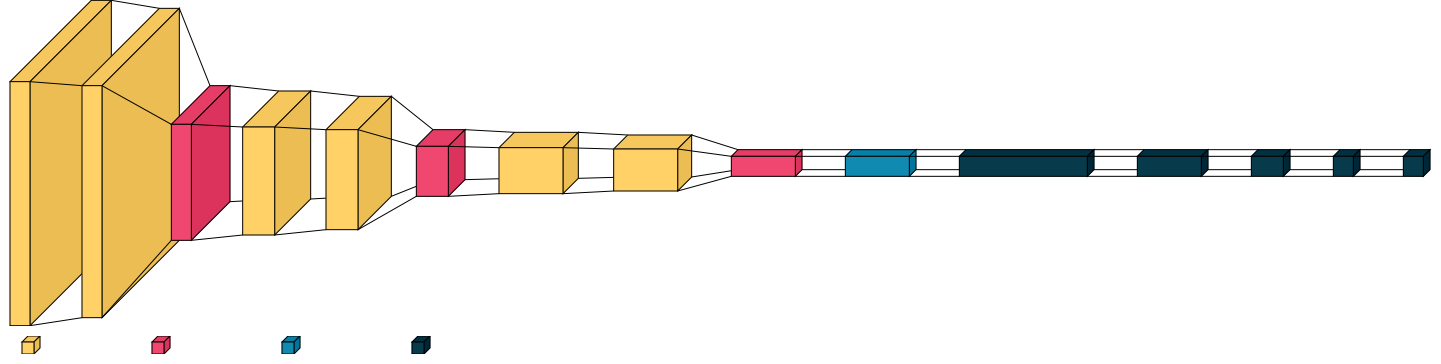

<Figure size 640x480 with 0 Axes>

In [ ]:
#pip install visualkeras
#Plotting the model
import visualkeras
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout
plt.figure(dpi = 100)
visualkeras.layered_view(model, spacing = 50,  scale_z = 1, scale_xy = 2 , legend=True, type_ignore=[BatchNormalization, Activation, Dropout])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('saved-models/best.weights.h5',
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint],
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6466 - loss: 0.6611
Epoch 1: val_loss improved from inf to 0.61601, saving model to saved-models/best.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.6478 - loss: 0.6605 - val_accuracy: 0.7203 - val_loss: 0.6160
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6963 - loss: 0.6217
Epoch 2: val_loss did not improve from 0.61601
30/30 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.6963 - loss: 0.6214 - val_accuracy: 0.7203 - val_loss: 0.6258
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7152 - loss: 0.6315
Epoch 3: val_loss improved from 0.61601 to 0.60474, saving model to saved-models/best.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.7146 - loss: 0.6314 - val_accuracy: 0.7203 - val_loss: 0.6047
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6988 - loss: 0.6069
Epoch 4: val_loss improved from 0.60474 to 0.58365, saving model to saved-models/be

In [ ]:
hist_df = pd.DataFrame(history.history)

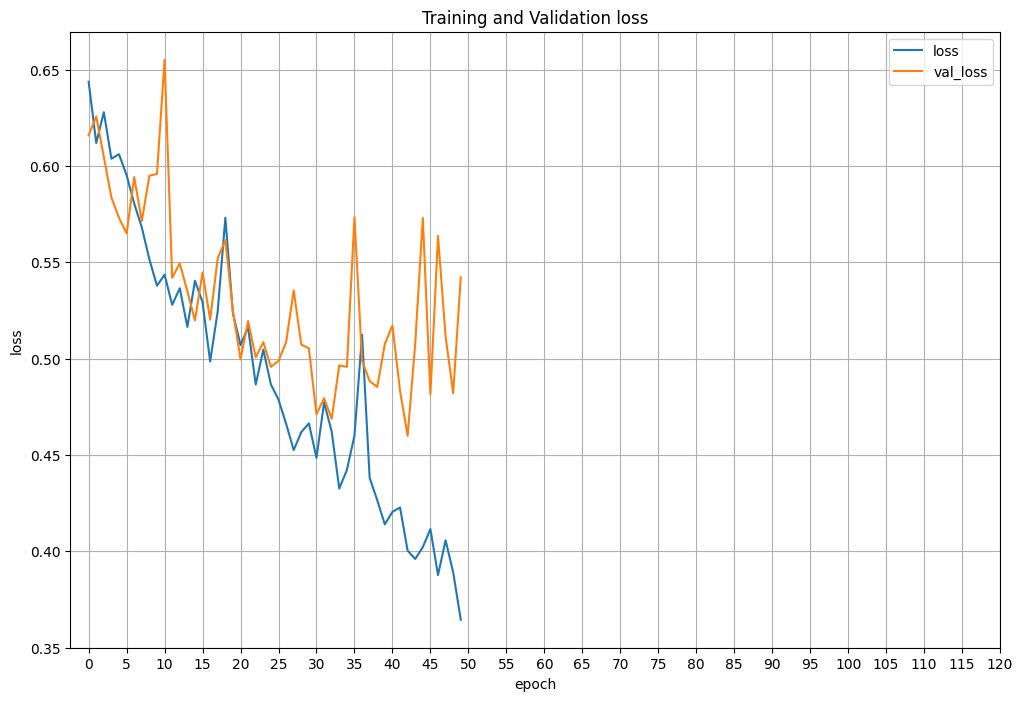

In [ ]:
hist_df.plot(y=['loss', 'val_loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.show()

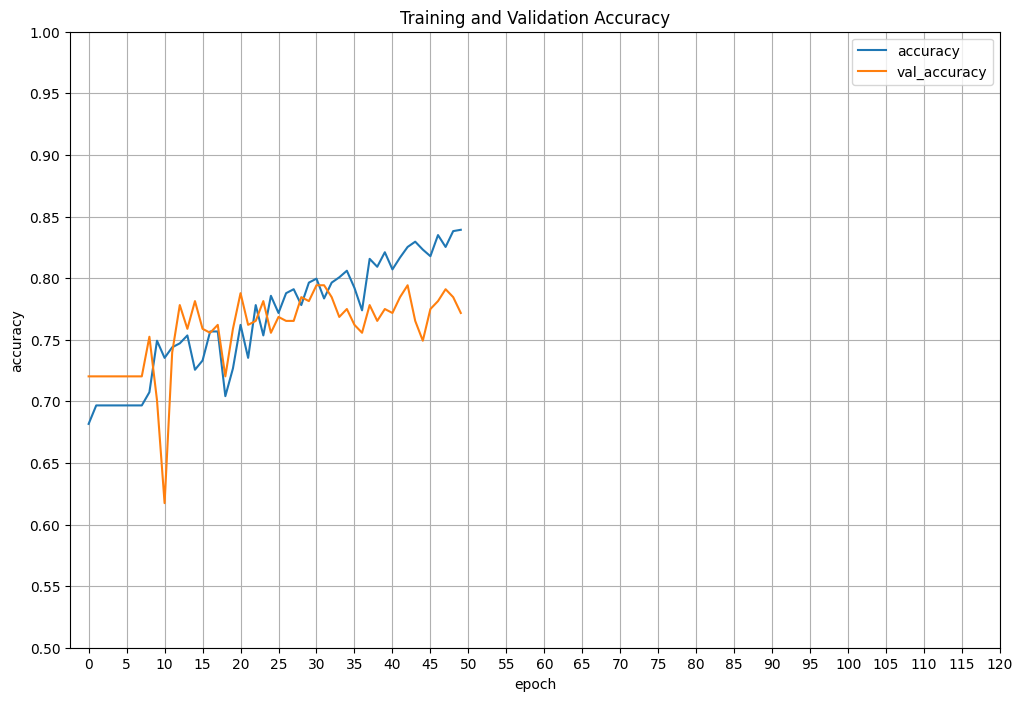

In [ ]:
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 835ms/step - accuracy: 0.7032 - loss: 0.5662


[0.5549802780151367, 0.7307692170143127]

# **model ده الى هنستخدمه عشان نفتكر ال   **

In [ ]:

# 1. إعادة بناء بنية النموذج (نفس البنية التي استخدمتها أثناء التدريب)
model = Sequential()
model.add(Conv2D(16, 7, activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(16, 7, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 5, activation='relu'))
model.add(Conv2D(32, 5, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(GlobalAvgPool2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 2. تحميل الأوزان المحفوظة
model.load_weights('saved-models/best.weights.h5')

# 3. تجميع النموذج (مطلوب قبل استخدامه)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# الآن يمكنك استخدام النموذج للتنبؤ على البيانات الجديدة


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# إدخال بيانات جديدة للتنبؤ
predictions = model.predict(X_test)  # ضع هنا بيانات الاختبار (X_test)

# عرض النتائج
predictions

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 736ms/step


array([[0.87904936],
       [0.9857335 ],
       [0.7672757 ],
       [0.34403887],
       [0.7076725 ],
       [0.77894175],
       [0.9986787 ],
       [0.01938906],
       [0.8800088 ],
       [0.77200437],
       [0.8523597 ],
       [0.73345876],
       [0.8024923 ],
       [0.9354092 ],
       [0.69615555],
       [0.89500415],
       [0.92000854],
       [0.55351126],
       [0.9429558 ],
       [0.7638279 ],
       [0.66751856],
       [0.978367  ],
       [0.6896213 ],
       [0.8947511 ],
       [0.9531417 ],
       [0.893065  ],
       [0.02394792],
       [0.9682017 ],
       [0.05114062],
       [0.6722687 ],
       [0.980749  ],
       [0.9850141 ],
       [0.79575837],
       [0.51119703],
       [0.9072758 ],
       [0.67638284],
       [0.1168645 ],
       [0.9486232 ],
       [0.9786105 ],
       [0.8557211 ],
       [0.54822695],
       [0.8742514 ],
       [0.86701226],
       [0.7348769 ],
       [0.7500768 ],
       [0.97023106],
       [0.96346444],
       [0.852

### **model with feature and images**

In [ ]:
X_test_features = test_df[['eyetomouth', 'eyetoeye']].values
X_train_features = train_df[['eyetomouth', 'eyetoeye']].values
X_val_features = val_df[['eyetomouth', 'eyetoeye']].values

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, Conv2D, MaxPool2D, GlobalAvgPool2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Step 1: Image Input (RGB images)
image_input = Input(shape=(IMG_DIM, IMG_DIM, 3))  # Input shape for RGB images

# Convolutional layers
x = Conv2D(16, 7, activation='relu')(image_input)
x = Conv2D(16, 7, activation='relu')(x)
x = MaxPool2D(2)(x)
x = Conv2D(32, 5, activation='relu')(x)
x = Conv2D(32, 5, activation='relu')(x)
x = MaxPool2D(2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(2)(x)
x = GlobalAvgPool2D()(x)

# Step 2: Feature Input (eyetoeye, eyetomouth)
feature_input = Input(shape=(2,))  # Two features: eye-to-eye and eye-to-mouth distances

# Step 3: Concatenate image features and additional features
combined = Concatenate()([x, feature_input])

# Step 4: Fully connected layers
combined = Dense(128, activation='relu')(combined)
combined = Dense(64, activation='relu')(combined)
combined = Dense(32, activation='relu')(combined)
combined = Dense(16, activation='relu')(combined)
output = Dense(1, activation='sigmoid')(combined)

# Step 5: Create the final model
model2 = Model(inputs=[image_input, feature_input], outputs=output)

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Checkpoint callback to save the best model
checkpoint = ModelCheckpoint('saved-models/best_model2.weights.h5',
                             save_weights_only=True,
                             save_best_only=True,
                             verbose=1)

# Step 6: Train the model
history2 = model2.fit(
    [X_train, X_train_features],  y_train,validation_data=([X_val, X_val_features], y_val),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint],
)



Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6089 - loss: 0.7714
Epoch 1: val_loss improved from inf to 0.60785, saving model to saved-models/best_model2.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.6091 - loss: 0.7698 - val_accuracy: 0.7203 - val_loss: 0.6078
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6872 - loss: 0.6362
Epoch 2: val_loss did not improve from 0.60785
30/30 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.6865 - loss: 0.6369 - val_accuracy: 0.6559 - val_loss: 0.6691
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6796 - loss: 0.6581
Epoch 3: val_loss did not improve from 0.60785
30/30 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.6790 - loss: 0.6582 - val_accuracy: 0.7203 - val_loss: 0.6102
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6412 - loss: 0.6655
Epoch 4: val_loss improved from 0.60785 to 0.59293, saving model to saved-models/best_model2.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


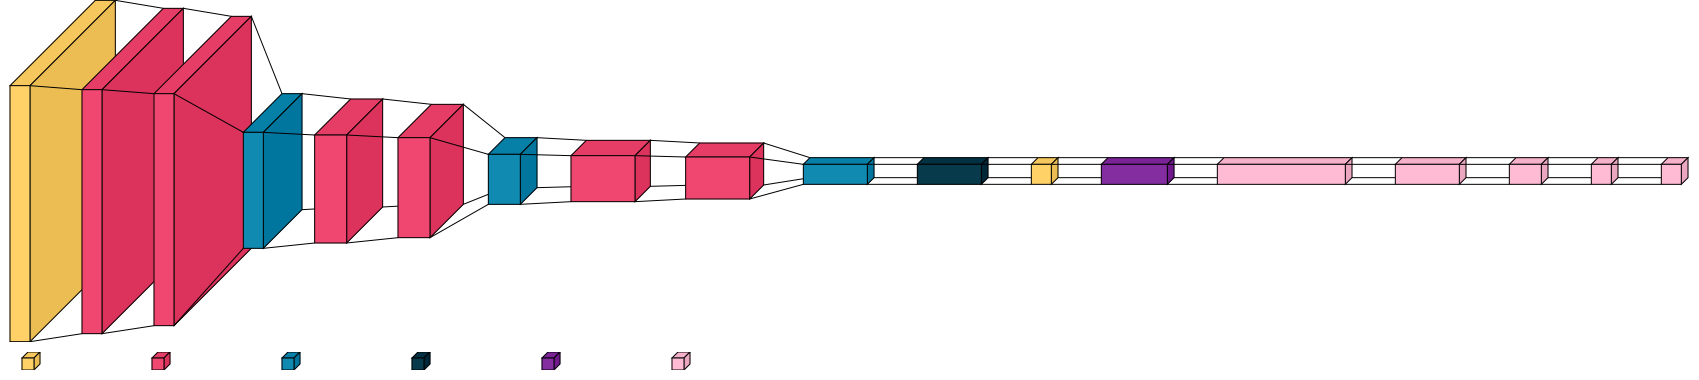

<Figure size 640x480 with 0 Axes>

In [ ]:
# pip install visualkeras
#Plotting the model
import visualkeras
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout
plt.figure(dpi = 100)
visualkeras.layered_view(model2, spacing = 50,  scale_z = 1, scale_xy = 2 , legend=True, type_ignore=[BatchNormalization, Activation, Dropout])

In [ ]:
hist_df2 = pd.DataFrame(history2.history)

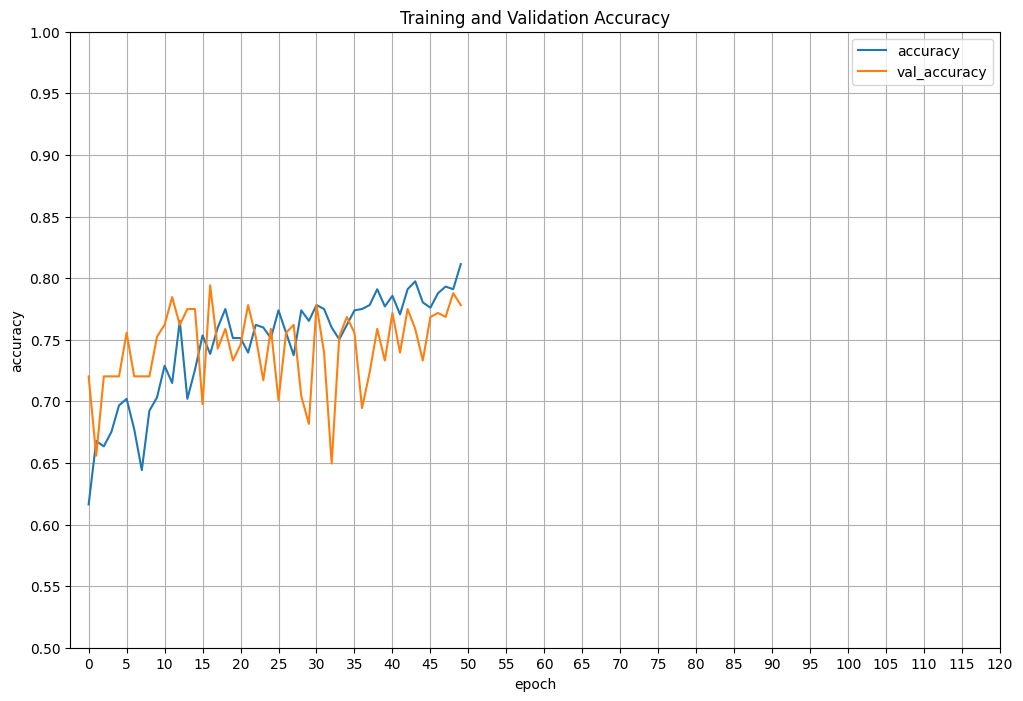

In [ ]:
hist_df2.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

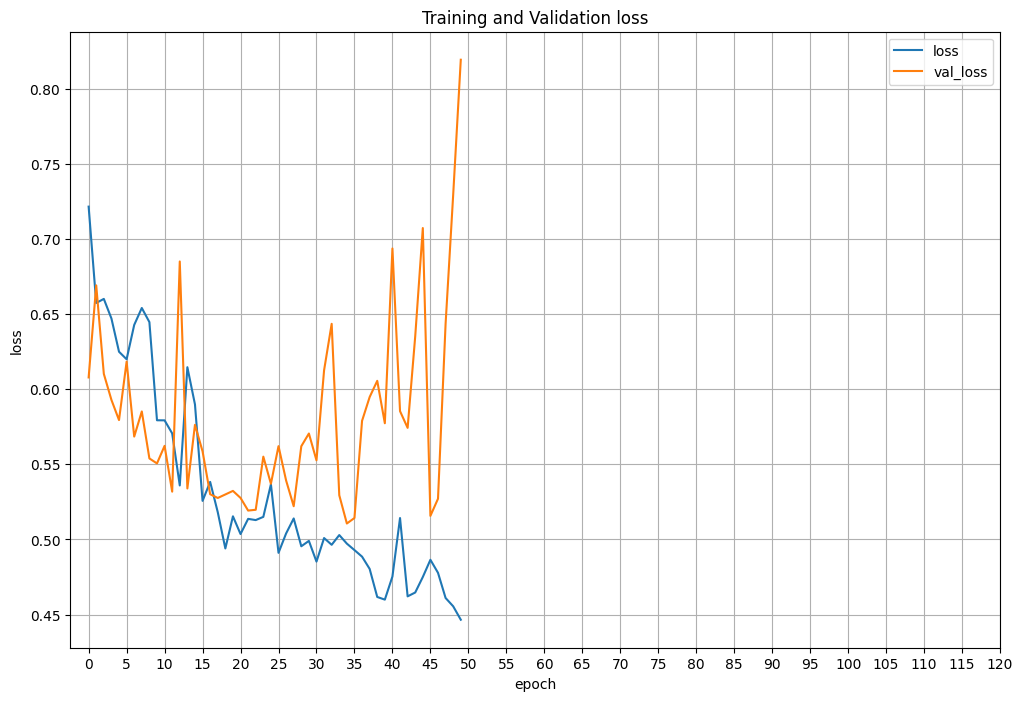

In [ ]:
hist_df2.plot(y=['loss', 'val_loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.show()

In [ ]:
model2.evaluate([X_test, X_test_features], y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 715ms/step - accuracy: 0.7988 - loss: 0.4819


[0.48086607456207275, 0.7884615659713745]

**model MobileNet**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import GlobalAvgPool2D, Dense

In [ ]:
pretrained = MobileNetV2(
    input_shape=X_train[0].shape,
    include_top=False
)
pretrained.trainable = False

model = Sequential()
model.add(pretrained)
model.add(GlobalAvgPool2D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

MODEL_PATH = 'saved-models/mobilenet'

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (1, 4, 4, 1280)             │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_10          │ (1, 1280)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (1, 1)                      │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
pretrained.summary()

Model: "mobilenetv2_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


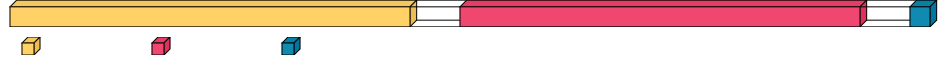

<Figure size 640x480 with 0 Axes>

In [ ]:
#pip install visualkeras
#Plotting the model
import visualkeras
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout
plt.figure(dpi = 100)
visualkeras.layered_view(model, spacing = 50,  scale_z = 1, scale_xy = 2 , legend=True, type_ignore=[BatchNormalization, Activation, Dropout])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('saved-models/best3.weights.h5',
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint],
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6279 - loss: 0.6716
Epoch 1: val_loss improved from inf to 0.52851, saving model to saved-models/best3.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.6297 - loss: 0.6693 - val_accuracy: 0.7588 - val_loss: 0.5285
Epoch 2/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7558 - loss: 0.4805
Epoch 2: val_loss improved from 0.52851 to 0.46116, saving model to saved-models/best3.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7581 - loss: 0.4789 - val_accuracy: 0.8167 - val_loss: 0.4612
Epoch 3/50
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8432 - loss: 0.3908
Epoch 3: val_loss improved from 0.46116 to 0.43698, saving model to saved-models/best3.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8413 - loss: 0.3922 - val_accuracy: 0.7974 - val_loss: 0.4370
Epoch 4/50
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8215 - loss: 0.3846
Epoch 4: val_loss im

In [ ]:
hist_df = pd.DataFrame(history.history)

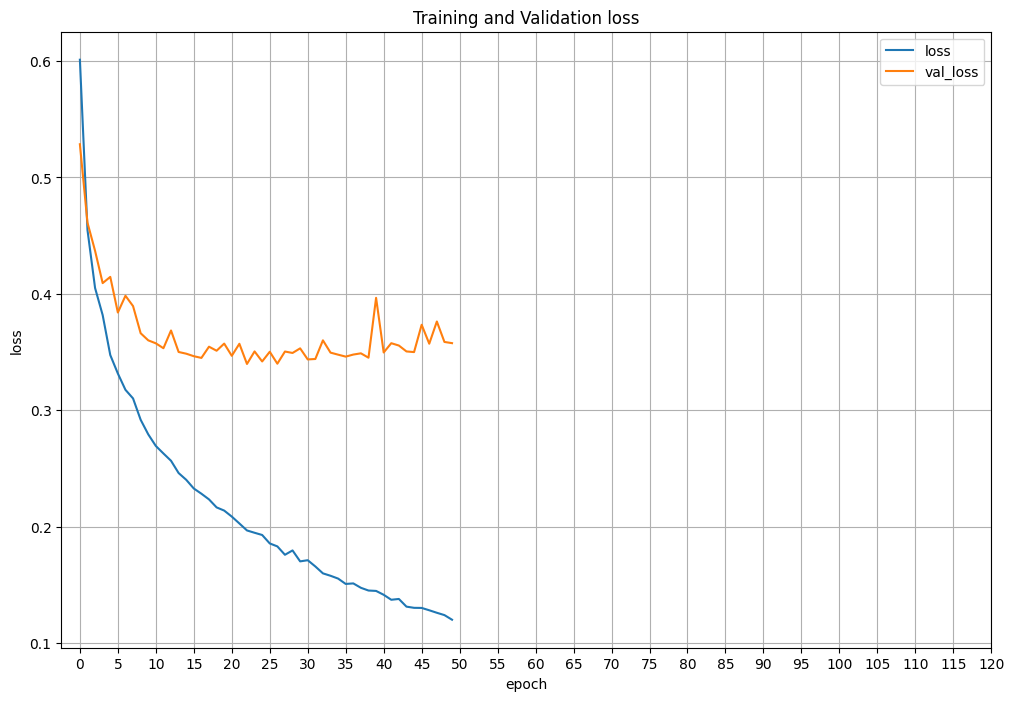

In [ ]:
hist_df.plot(y=['loss', 'val_loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.show()

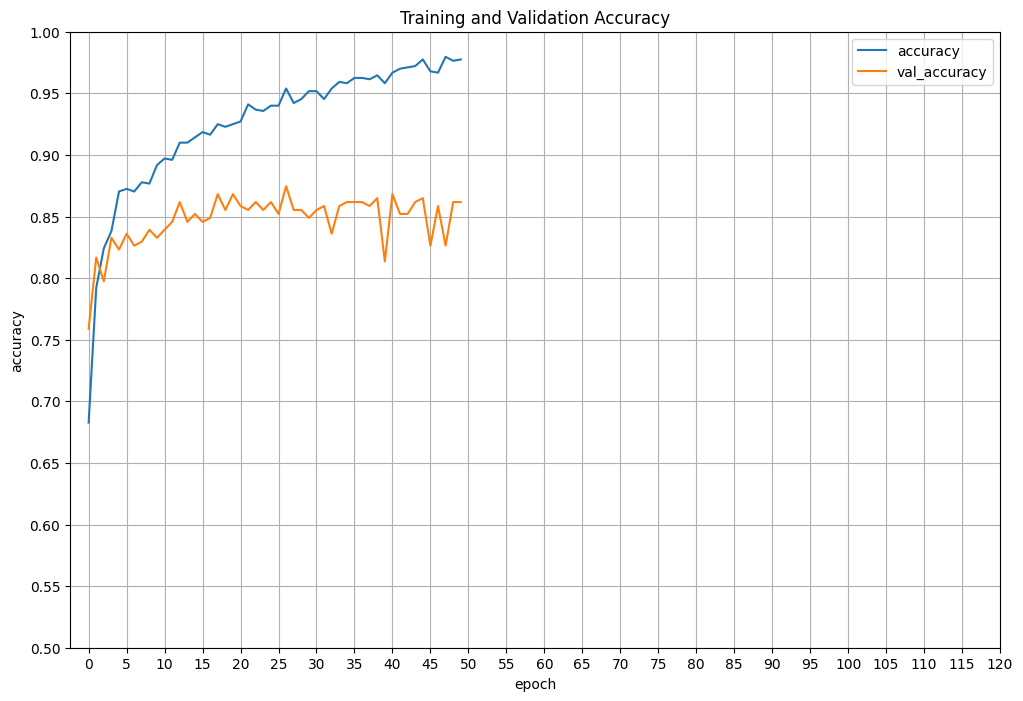

In [ ]:
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.8530 - loss: 0.3225


[0.33523932099342346, 0.8589743375778198]

**model ResNet**

In [ ]:
from tensorflow.keras.applications.resnet import ResNet152

In [ ]:
pretrained = ResNet152(
    input_shape=X_train[0].shape,
    include_top=False
)
pretrained.trainable = False

model = Sequential()
model.add(pretrained)
model.add(GlobalAvgPool2D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


MODEL_PATH = 'saved-models2/resnet'

In [ ]:
dummy_input = np.random.rand(1, IMG_DIM, IMG_DIM, 3)
model.predict(dummy_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


array([[0.35598361]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)               │ (1, 4, 4, 2048)             │      58,370,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_13          │ (1, 2048)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (1, 1)                      │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,372,993 (222.68 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 58,370,944 (222.67 MB)

In [ ]:
pretrained.summary()

Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 58,370,944 (222.67 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,370,944 (222.67 MB)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


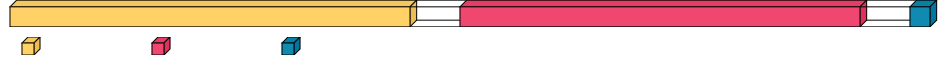

<Figure size 640x480 with 0 Axes>

In [ ]:
import visualkeras
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout
plt.figure(dpi = 100)
visualkeras.layered_view(model, spacing = 50,  scale_z = 1, scale_xy = 2 , legend=True, type_ignore=[BatchNormalization, Activation, Dropout])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('saved-models/best4.weights.h5',
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint],
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.3900 - loss: 0.7735
Epoch 1: val_loss improved from inf to 0.60550, saving model to saved-models/best3.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 873ms/step - accuracy: 0.3941 - loss: 0.7715 - val_accuracy: 0.7203 - val_loss: 0.6055
Epoch 2/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6843 - loss: 0.6253
Epoch 2: val_loss improved from 0.60550 to 0.59343, saving model to saved-models/best3.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.6851 - loss: 0.6246 - val_accuracy: 0.7203 - val_loss: 0.5934
Epoch 3/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6840 - loss: 0.6248
Epoch 3: val_loss improved from 0.59343 to 0.59255, saving model to saved-models/best3.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.6848 - loss: 0.6241 - val_accuracy: 0.7203 - val_loss: 0.5926
Epoch 4/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6921 - loss: 0.6156
Epoch 4: val_los

In [ ]:
hist_df = pd.DataFrame(history.history)

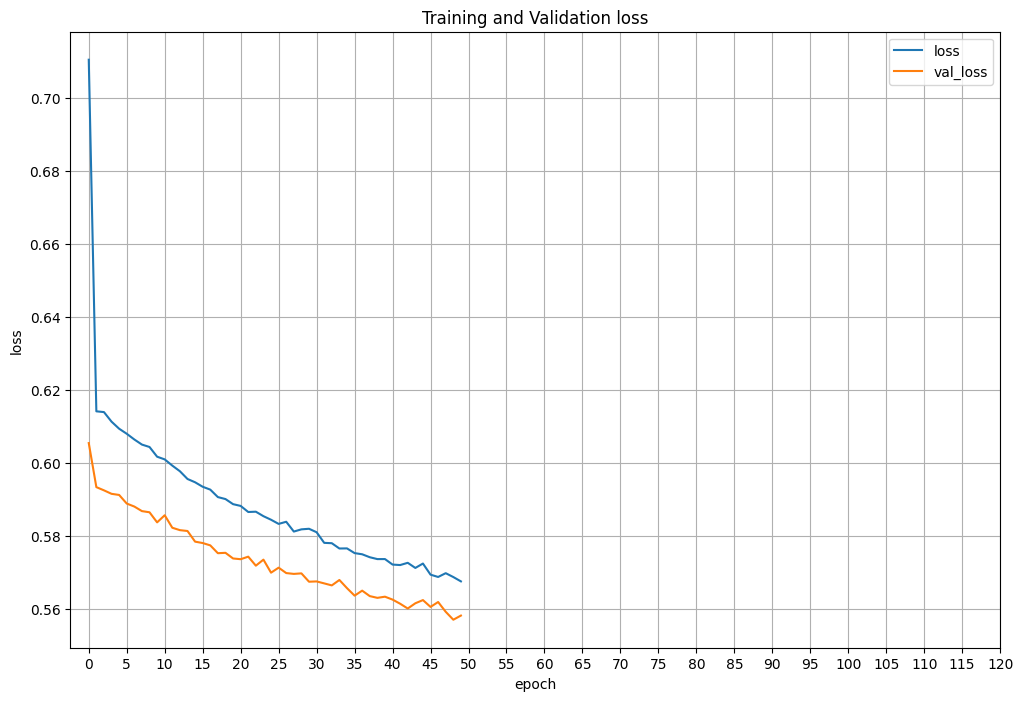

In [ ]:
hist_df.plot(y=['loss', 'val_loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.show()

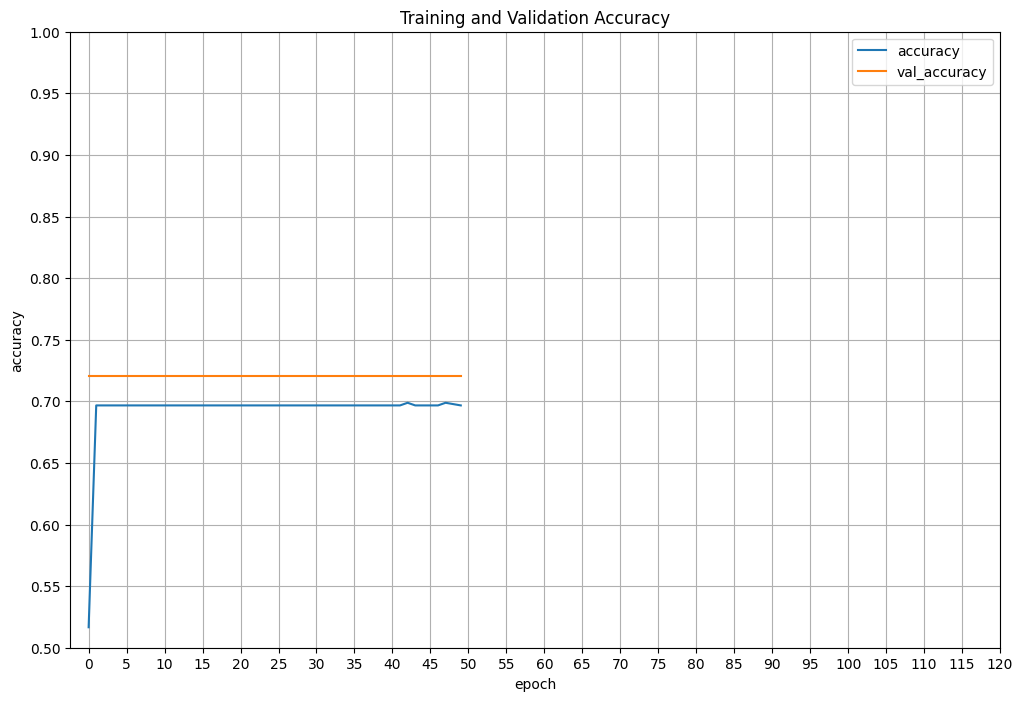

In [ ]:
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 611ms/step - accuracy: 0.7261 - loss: 0.5468


[0.5571992993354797, 0.7115384340286255]

**model VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
pretrained = VGG16(input_shape=X_train[0].shape, include_top=False, weights='imagenet')

pretrained.trainable = False

model = Sequential()
model.add(pretrained)
model.add(GlobalAvgPool2D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


MODEL_PATH = 'saved-models3/resnet'

In [ ]:
dummy_input = np.random.rand(1, IMG_DIM, IMG_DIM, 3)
model.predict(dummy_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.2215897]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (1, 4, 4, 512)              │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_16          │ (1, 512)                    │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (1, 1)                      │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
pretrained.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('saved-models/best5.weights.h5',
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint],
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.3606 - loss: 1.0078
Epoch 1: val_loss improved from inf to 0.60070, saving model to saved-models/best4.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 344ms/step - accuracy: 0.3633 - loss: 1.0025 - val_accuracy: 0.7203 - val_loss: 0.6007
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6966 - loss: 0.6177
Epoch 2: val_loss improved from 0.60070 to 0.58300, saving model to saved-models/best4.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.6966 - loss: 0.6177 - val_accuracy: 0.7203 - val_loss: 0.5830
Epoch 3/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6792 - loss: 0.6202
Epoch 3: val_loss improved from 0.58300 to 0.57523, saving model to saved-models/best4.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6803 - loss: 0.6190 - val_accuracy: 0.7203 - val_loss: 0.5752
Epoch 4/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6827 - loss: 0.6000
Epoch 4: val_loss i

In [ ]:
hist_df = pd.DataFrame(history.history)

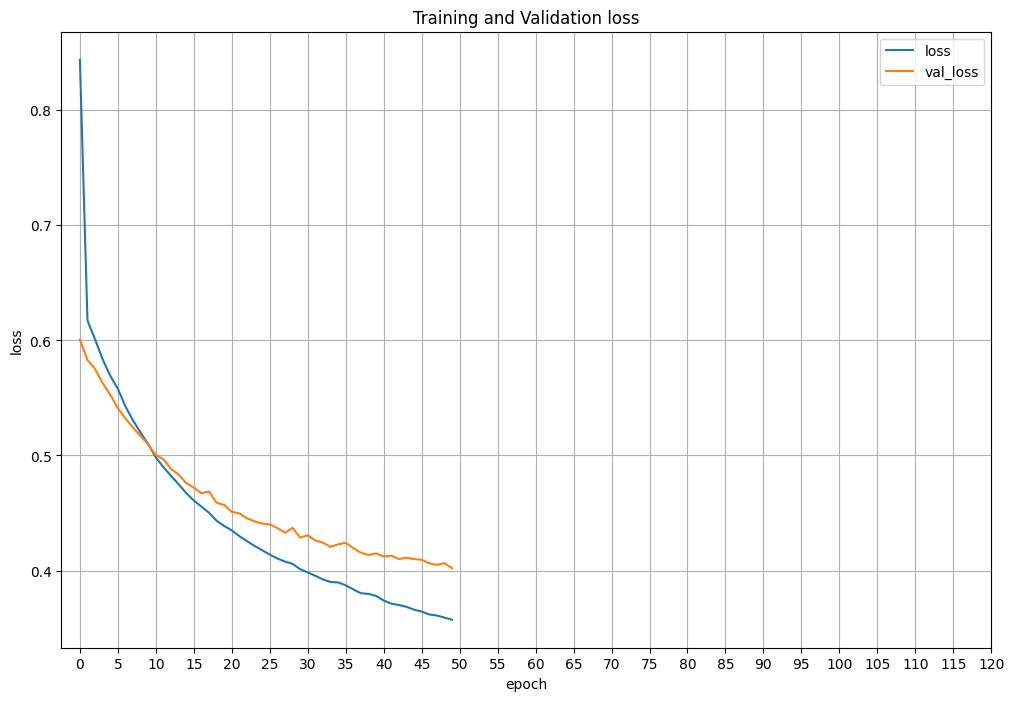

In [ ]:
hist_df.plot(y=['loss', 'val_loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.show()

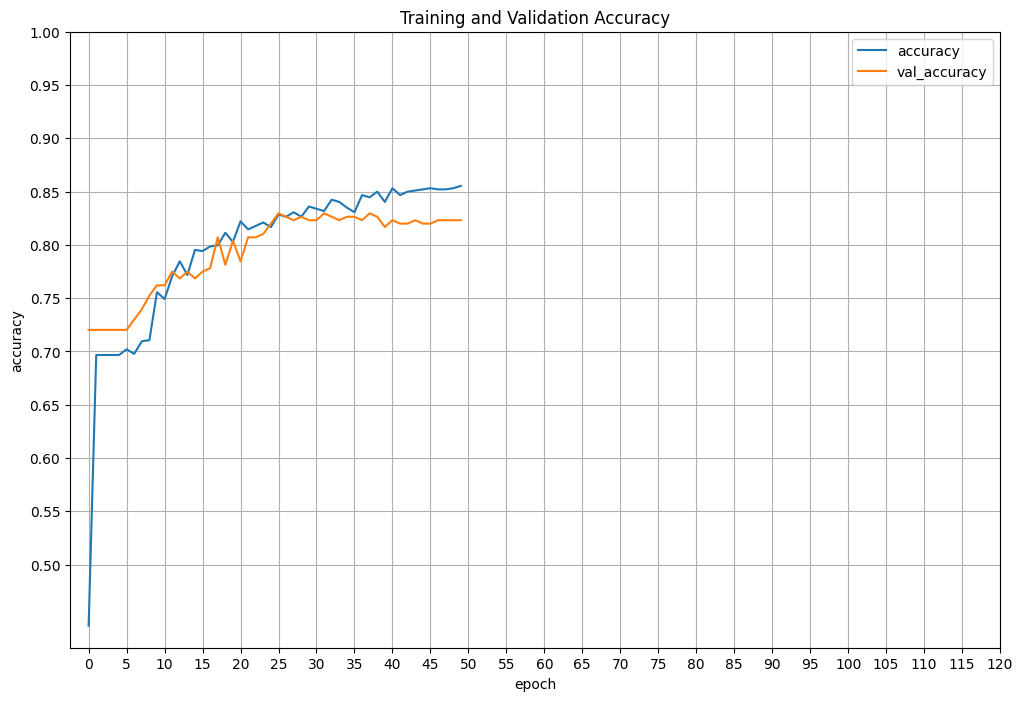

In [ ]:
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 671ms/step - accuracy: 0.8314 - loss: 0.3613


[0.3857541084289551, 0.817307710647583]

**model** **VGG19**


In [ ]:
from tensorflow.keras.applications import VGG19

In [ ]:
pretrained = VGG19(input_shape=X_train[0].shape, include_top=False, weights='imagenet')

pretrained.trainable = False

model = Sequential()
model.add(pretrained)
model.add(GlobalAvgPool2D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


MODEL_PATH = 'saved-models3/resnet'

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
dummy_input = np.random.rand(1, IMG_DIM, IMG_DIM, 3)
model.predict(dummy_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


array([[0.41034794]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (1, 4, 4, 512)              │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_17          │ (1, 512)                    │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (1, 1)                      │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,024,897 (76.39 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
pretrained.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)          │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('saved-models/best6.weights.h5',
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint],
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.4144 - loss: 0.8078
Epoch 1: val_loss improved from inf to 0.60497, saving model to saved-models/best6.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.4187 - loss: 0.8049 - val_accuracy: 0.7203 - val_loss: 0.6050
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6929 - loss: 0.6333
Epoch 2: val_loss improved from 0.60497 to 0.58673, saving model to saved-models/best6.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.6930 - loss: 0.6330 - val_accuracy: 0.7203 - val_loss: 0.5867
Epoch 3/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6885 - loss: 0.6131
Epoch 3: val_loss improved from 0.58673 to 0.56685, saving model to saved-models/best6.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.6890 - loss: 0.6123 - val_accuracy: 0.7203 - val_loss: 0.5669
Epoch 4/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7050 - loss: 0.5766
Epoch 4: val_loss im

In [ ]:
hist_df = pd.DataFrame(history.history)

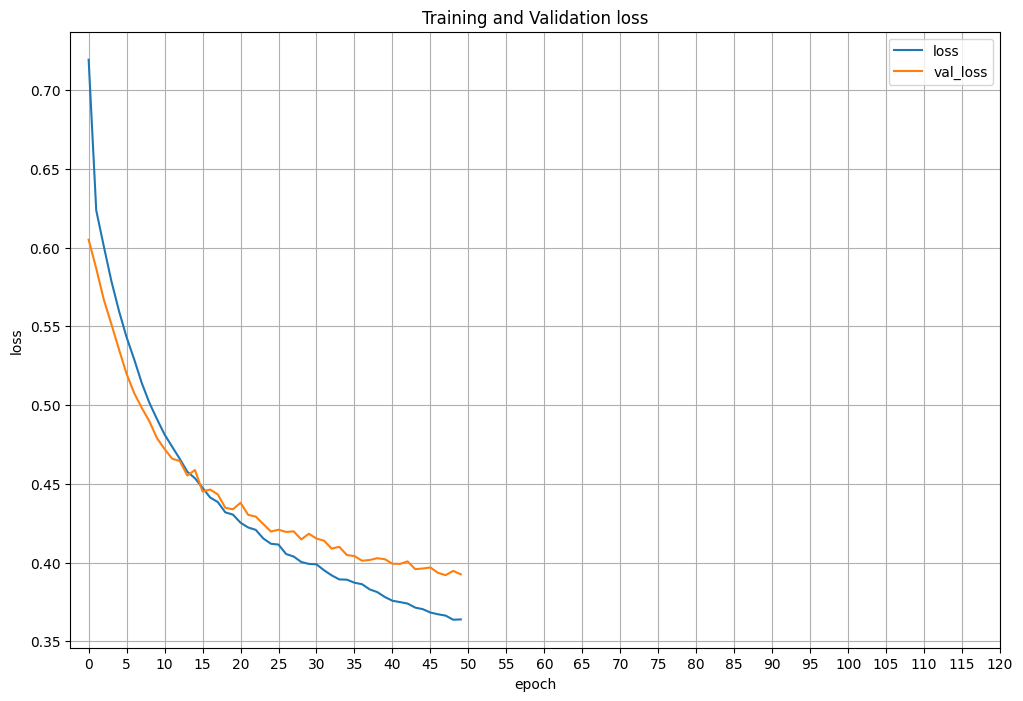

In [ ]:
hist_df.plot(y=['loss', 'val_loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.show()

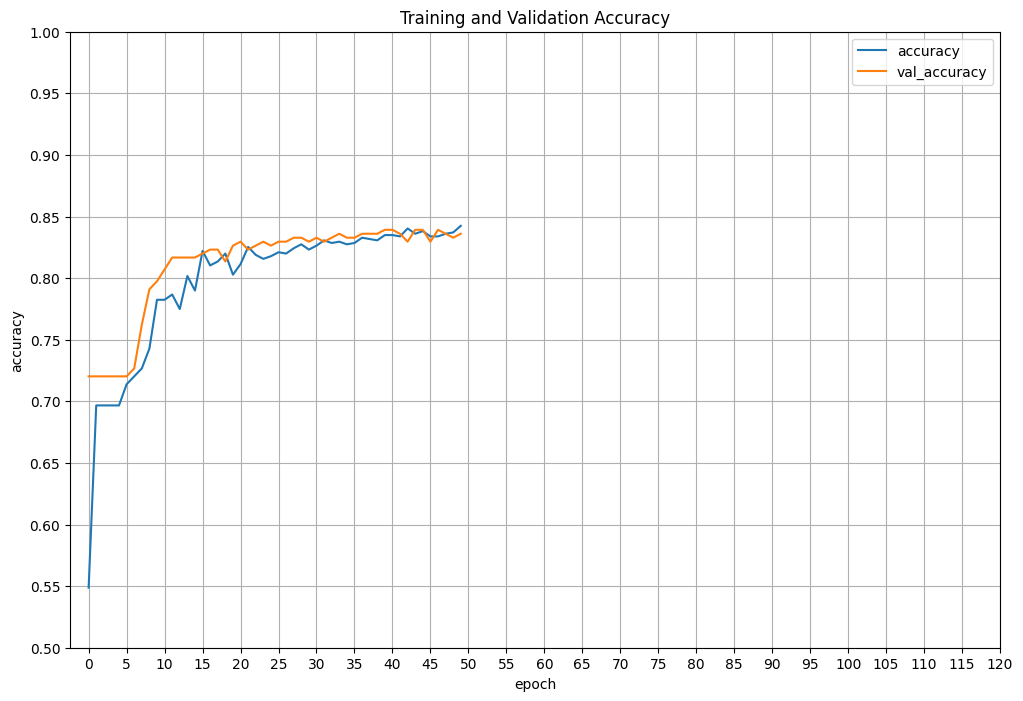

In [ ]:
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.8429 - loss: 0.3803


[0.391970157623291, 0.8397436141967773]